# Part II - Prosper Loan Data Presentation
## by Wellington Chentulo

## Investigation Overview
In this project, I wanted to find out what features influence the borrower's interest rate for a loan, and whether these features could be used to predict the interest rate on borrowing. The main focus for this exploration was on the fetures that may influence the borrower's interest rate.


## Dataset Overview

The dataset used in this exploration consisted of loan information from Prosper, containing 113,937 loan observations.
The dataset contained 81 observations, such as the borrower's interest rate, the Prosper score and the lender's yield in a particular loan. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosper_loan_data.csv')

In [4]:
# data wrangling, removing missing data, outliers

# create a copy data
loan_data = loans.copy()

columns_of_interest = ['Term',
                       'BorrowerRate',
                       'ProsperScore',                       
                       'IsBorrowerHomeowner',
                       'Investors',
                       'IncomeVerifiable',
                       'AmountDelinquent',
                       'LoanOriginalAmount',
                       'Recommendations',
                       'LenderYield',
                       'CurrentDelinquencies'                       
                      ]

loan_data = loan_data[columns_of_interest]

# Drop all observations with null values
loan_data.dropna(inplace=True)
 
# Convert ProsperScore and CurrentDelinquencies to be integer values
loan_data[["ProsperScore", "CurrentDelinquencies"]] = loan_data[["ProsperScore", "CurrentDelinquencies"]].astype('int64')
    
# Drop all ProsperScore values greater than 10
loan_data.drop(loan_data[loan_data["ProsperScore"] > 10].index, inplace=True)

## How are the borrower rates distribution?
The borrower rate is the interest rate that the borrower pays on a particular loan. In my observation of the borrower rate, most of the rates were concentrated between 9 and 25 percent. However, the data showed one peak in the borrower rate between 31 and 32 percent.

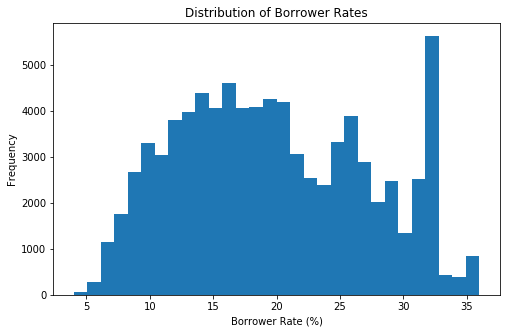

In [38]:
# Plot a histogram of the borrower rates as a proportion
(loan_data.BorrowerRate*100).plot.hist(bins=30, figsize=(8, 5));
plt.xlabel('Borrower Rate (%)');
plt.title('Distribution of Borrower Rates');

## What is the distribution of Prosper score?
I observed that Prosper score for most of the loans ranged between 2 and 9, with 4, 6 and 8 being the three most common scores.

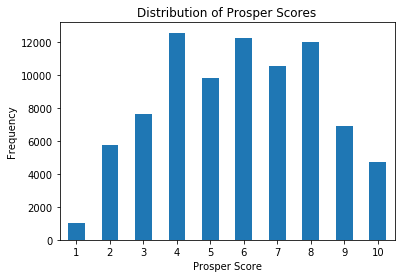

In [66]:
# Plot a bar chart of the ProsperScore variable 
loan_data['ProsperScore'].value_counts(sort=False).plot.bar(rot=0)
plt.xlabel('Prosper Score');
plt.ylabel('Frequency')
plt.title('Distribution of Prosper Scores');

## What did the distribution of lender yield show?

The lender's yield on the loan showed a distribution similar to that of the borrower rate. This can be expected to be the case since the variable definition of the LenderYield variable is "the interest rate on the loan less the servicing fee". This distribution is shown in the histogram below.

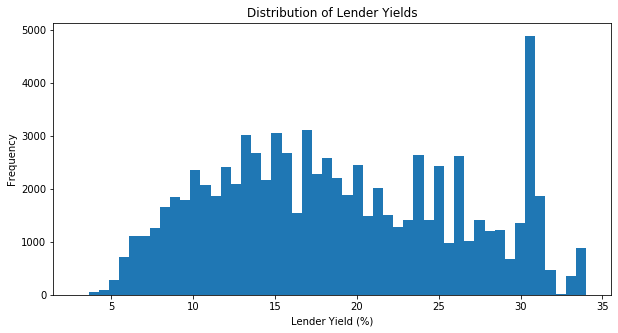

In [9]:
# Plot the distribution of lender yields as proportions
(loan_data['LenderYield']*100).plot.hist(figsize=[10, 5], bins=50);
plt.xlabel('Lender Yield (%)');
plt.title('Distribution of Lender Yields');

## Pairwise Correlation Heatmap
The pairwise correlation heatmap shows a perfect positive relationship between the the borrower's interest rate and the lender's yield. Both the lender's yield and the borrower's interest rates are negatively correlated



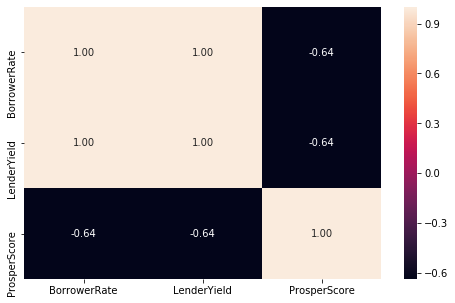

In [48]:
# Plot a correlation heatmap to chek for variables that are correlated
plt.figure(figsize = [8, 5]);
sb.heatmap(loan_data[['BorrowerRate', 'LenderYield', 'ProsperScore']].corr(), annot=True, fmt='.2f');

## Scatterplot of Borrower Rate vs Lender Yield
The scatterplot below shows a perfect positive correlation between the borrower's interest rate and the lender's yield on a particular loan.

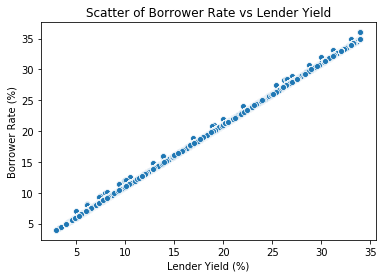

In [57]:
# Plot a scatterplot between lender yield and borrower rate

# variables to store lender yield and borrower rate values as percentages
lender_yield_pct = loan_data["LenderYield"]*100 
borrower_rate_pct = loan_data["BorrowerRate"]*100

sb.scatterplot(x=lender_yield_pct, y=borrower_rate_pct, data=loan_data);
plt.xlabel('Lender Yield (%)');
plt.ylabel('Borrower Rate (%)');
plt.title('Scatter of Borrower Rate vs Lender Yield');

## How is the borrower rate distributed for each Prosper score category?
The correlation heatmap between borrower interest rate and Prosper scores shows a negative correlation between the the two variables. This is further supported by the boxplots plotted for each Prosper score below, which show that as the risk level of the loan increased (Prosper score closer to 1) so did the borrower's rate on the loan. And as loan's risk reduced (Prosper scores closer to 10) the borrower's rate reduced. This implies that riskier loans attract higher interest rates for the borrower.

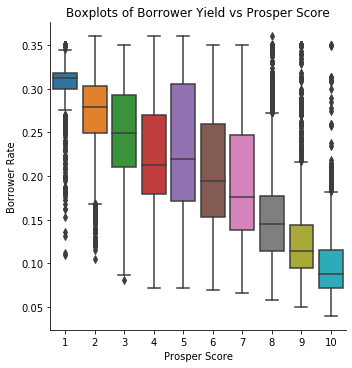

In [10]:
# Plot a boxplot and see how the borrower rate is distributed for risk each category.

sb.catplot(data=loan_data, x="ProsperScore", y="BorrowerRate", kind="box", dodge=False)
plt.xlabel('Prosper Score');
plt.ylabel ('Borrower Rate');
plt.title('Boxplots of Borrower Yield vs Prosper Score');

## Summary
The following is summary of my findings in this project:

- Borrowers' interest rates on a loan are positively correlated with lenders' yields on the loan.
- Riskier loans attract higher interest rates for the borrower
- Risker loans yield higher returns for the lender

## Limitations
The following are some of the limitations/challenges I encountered in this project:
- Due to the large size of the dataset, tt was challenging to conduct visual assessment of the entire data
- It was challenging to correctly plot categorical variables
- Finding informative relationships between numeric variables and categorical features was a challenge
- Further exploration and analysis needs to be conducted in order to determine any causality between variables